<a href="https://colab.research.google.com/github/NickOLeeney/data-science-projects/blob/main/TitanicProject_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Project

## Introduction

In this project there will be analyzed data taken from Titanic accident in 1912. The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

The training set should be used to build the machine learning models. For the training set, it is provided the outcome for each passenger.

The test set should be used to see how well your model performs on unseen data. For the test set, it is not provide the outcome for each passenger. For each passenger in the test set, the model will try to predict whether or not they survived the sinking of the Titanic.


Data Dictionary:

| Variable      | Definition |  Key      | 
| ----------- | ----------- |--------------| 
| survival      | Survival       |  0 = No, 1 = Yes            |
| pclass   | Ticket class        | 1 = 1st, 2 = 2nd, 3 = 3rd       | 
| sex   | Sex        |              |
| Age |   |   Age in years	           |
| sibsp   | # of siblings/spouses aboard the Titanic	      |              |
| parch   | # of parents / children aboard the Titanic        |              |
| ticket   | Ticket number        |              |
| fare   | Passenger fare	        |              |
| cabin   | Cabin number        |              |
| embarked   | Port of Embarkation        |    C = Cherbourg, Q = Queenstown, S = Southampton          |


Variable Notes
- pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Imports

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [ ]:
train_set = pd.read_csv('titanic_train.csv')
test_set = pd.read_csv('titanic_test.csv')

In [ ]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Exploratory Data Analysis

### Missing Data

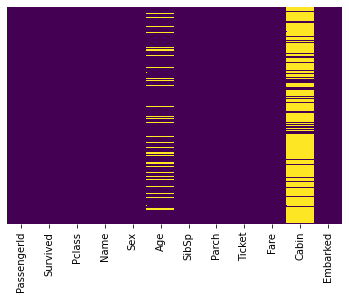

In [ ]:
sns.heatmap(train_set.isnull(), yticklabels=False, cbar= False, cmap = 'viridis')

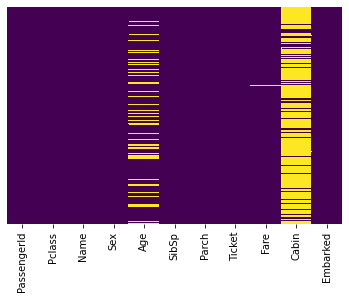

In [ ]:
sns.heatmap(test_set.isnull(), yticklabels=False, cbar= False, cmap = 'viridis')

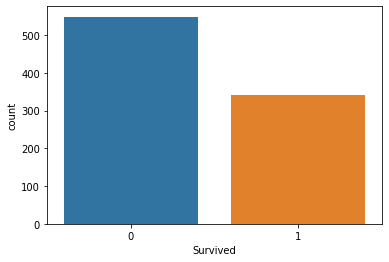

In [ ]:
sns.countplot(data = train_set, x = 'Survived')

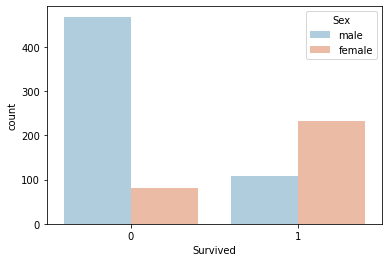

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=train_set,palette='RdBu_r')

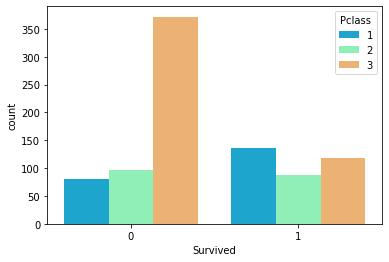

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=train_set,palette='rainbow')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


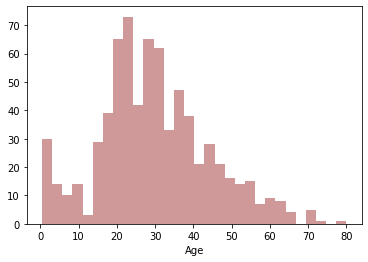

In [ ]:
sns.distplot(train_set['Age'].dropna(),kde=False,color='darkred',bins=30)

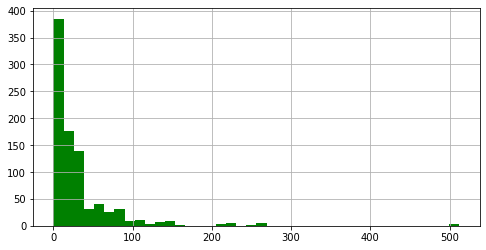

In [ ]:
train_set['Fare'].hist(color='green',bins=40,figsize=(8,4))

## Data Cleaning

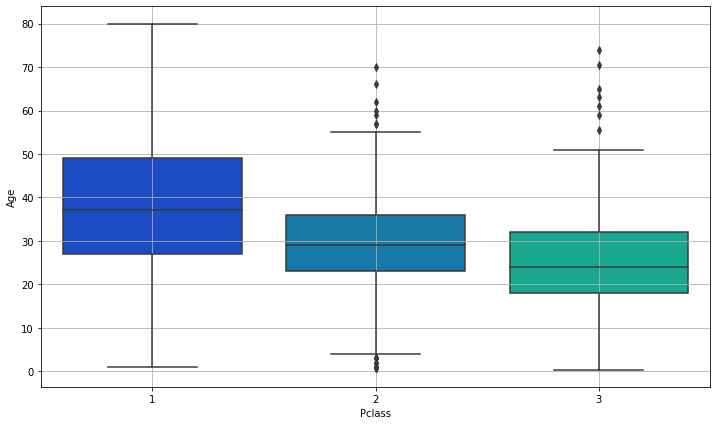

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(data = train_set, x = 'Pclass', y = 'Age', palette = 'winter')
plt.grid()

In [ ]:
def imputingByAgeTrain(cols):
  age = cols[0]
  pClass = cols[1]
  
  if pd.isnull(age):
    if pClass == 1:
      return train_set[train_set['Pclass'] == 1]['Age'].mean()
    elif pClass == 2:
      return train_set[train_set['Pclass'] == 2]['Age'].mean()
    else:
      return train_set[train_set['Pclass'] == 3]['Age'].mean()
  else: 
    return age;

def imputingByAgeTest(cols):
  age = cols[0]
  pClass = cols[1]
  
  if pd.isnull(age):
    if pClass == 1:
      return test_set[test_set['Pclass'] == 1]['Age'].mean()
    elif pClass == 2:
      return test_set[test_set['Pclass'] == 2]['Age'].mean()
    else:
      return test_set[test_set['Pclass'] == 3]['Age'].mean()
  else: 
    return age;

In [ ]:
train_set['Age'] = train_set[['Age', 'Pclass']].apply(imputingByAgeTrain, axis = 1)
test_set['Age'] = test_set[['Age', 'Pclass']].apply(imputingByAgeTest, axis = 1)

In [ ]:
train_set.drop('Cabin', axis = 1, inplace = True)
test_set.drop('Cabin', axis = 1, inplace = True)

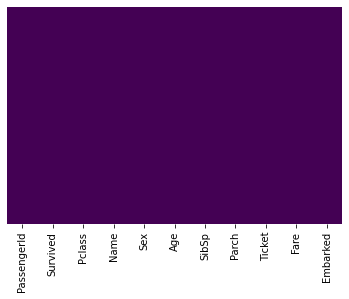

In [ ]:
sns.heatmap(train_set.isnull(), yticklabels=False, cbar= False, cmap = 'viridis')

In [ ]:
# Imputing Fare
test_set['Fare'] = test_set['Fare'].apply(lambda x: test_set['Fare'].mean() if pd.isnull(x) else x)

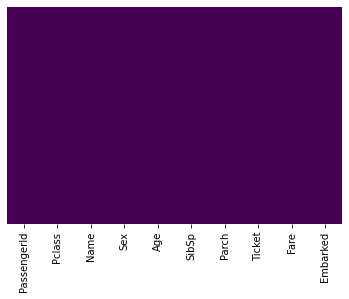

In [ ]:
sns.heatmap(test_set.isnull(), yticklabels=False, cbar= False, cmap = 'viridis')

## Converting Categorical Features

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [ ]:
# Getting dummy variables for 'Sex' and 'Embarked' columns
sex_train = pd.get_dummies(train_set['Sex'], drop_first=True)
sex_test = pd.get_dummies(test_set['Sex'], drop_first=True)
embark_train = pd.get_dummies(train_set['Embarked'], drop_first = True)
embark_test = pd.get_dummies(test_set['Embarked'], drop_first = True)

# Dropping 'Name' and 'Ticket' columns, no useful informations
train_set.drop('Name', axis = 1, inplace = True)
test_set.drop('Name', axis = 1, inplace = True)
train_set.drop('Ticket', axis = 1, inplace = True)
test_set.drop('Ticket', axis = 1, inplace = True)


In [ ]:
train_set.drop(['Sex', 'Embarked'], axis = 1, inplace = True)
test_set.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

In [ ]:
train_set = pd.concat([train_set, sex_train, embark_train], axis = 1)
test_set = pd.concat([test_set, sex_test, embark_test], axis = 1)

In [ ]:
train_set.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
test_set.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


## Logistic Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_set.drop('Survived', axis = 1), train_set.Survived, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()

In [ ]:
logModel.fit(X_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
yPredicted = logModel.predict(X_val)

### Evaluation

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
print(classification_report(y_val, yPredicted))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       154
           1       0.78      0.63      0.70       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.76       268



In [ ]:
confusion_matrix(y_val, yPredicted)

array([[134,  20],
       [ 42,  72]])

### Producing Results

In [ ]:
test_set.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [ ]:
train_set.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
y_test = logModel.predict(test_set)